In [1]:
import os
import csv
from pathlib import Path
from dotenv import load_dotenv
load_dotenv('.envrc')

def process_warehouse(directory):
    data_dict = {}

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                print(file_path)
                with open(file_path, mode='r', encoding='utf-8') as csv_file:
                    reader = csv.DictReader(csv_file)
                    for row in reader:
                        role = row.get('role')
                        phase_name = row.get('phase_name')
                        prompt_tokens = int(row.get('prompt_tokens', 0))
                        completion_tokens = int(row.get('completion_tokens', 0))

                        if role and phase_name:
                            key = (role, phase_name)
                            if key not in data_dict:
                                data_dict[key] = []
                            data_dict[key].append((prompt_tokens, completion_tokens))
    
    return data_dict

warehouse_statistics = process_warehouse('WareHouse')

# Example usage:
# warehouse_data = process_warehouse('WareHouse')
# print(warehouse_data)

WareHouse/Draughts_DefaultOrganization_20250430155934/Draughts_DefaultOrganization_20250430155934_usage_info.csv
WareHouse/Ludo_DefaultOrganization_20250430155930/Ludo_DefaultOrganization_20250430155930_usage_info.csv
WareHouse/Mastermind_DefaultOrganization_20250430160452/Mastermind_DefaultOrganization_20250430160452_usage_info.csv
WareHouse/Qwirkle_DefaultOrganization_20250430161346/Qwirkle_DefaultOrganization_20250430161346_usage_info.csv
WareHouse/Coup_DefaultOrganization_20250430162147/Coup_DefaultOrganization_20250430162147_usage_info.csv
WareHouse/Sorry!_DefaultOrganization_20250430161841/Sorry!_DefaultOrganization_20250430161841_usage_info.csv
WareHouse/Hive_DefaultOrganization_20250430161604/Hive_DefaultOrganization_20250430161604_usage_info.csv
WareHouse/Skull_DefaultOrganization_20250430162222/Skull_DefaultOrganization_20250430162222_usage_info.csv
WareHouse/Gomoku_DefaultOrganization_20250430155929/Gomoku_DefaultOrganization_20250430155929_usage_info.csv
WareHouse/Yahtzee_D

In [2]:
warehouse_statistics

{('Chief Product Officer', 'DemandAnalysis'): [(449, 5),
  (448, 5),
  (448, 5),
  (450, 5),
  (448, 5),
  (448, 5),
  (447, 5),
  (447, 5),
  (449, 5),
  (449, 5),
  (448, 5),
  (448, 5),
  (448, 5),
  (449, 5),
  (447, 5),
  (447, 5),
  (448, 5),
  (447, 5),
  (447, 5),
  (448, 5),
  (448, 5),
  (448, 5),
  (447, 5),
  (448, 5),
  (448, 5),
  (447, 5),
  (448, 5),
  (449, 5),
  (448, 5),
  (447, 5),
  (447, 5),
  (449, 5),
  (449, 5),
  (449, 5),
  (448, 5),
  (447, 5),
  (449, 5),
  (448, 5),
  (449, 5),
  (448, 5)],
 ('Chief Technology Officer', 'LanguageChoose'): [(394, 5),
  (392, 5),
  (392, 5),
  (396, 5),
  (392, 5),
  (392, 5),
  (390, 5),
  (390, 5),
  (394, 5),
  (394, 5),
  (392, 5),
  (392, 5),
  (392, 5),
  (394, 5),
  (390, 5),
  (390, 5),
  (392, 5),
  (390, 5),
  (390, 5),
  (392, 5),
  (392, 5),
  (392, 5),
  (390, 5),
  (392, 5),
  (392, 5),
  (390, 5),
  (392, 5),
  (394, 5),
  (392, 5),
  (390, 5),
  (390, 5),
  (394, 5),
  (394, 5),
  (394, 5),
  (392, 5),
  (390

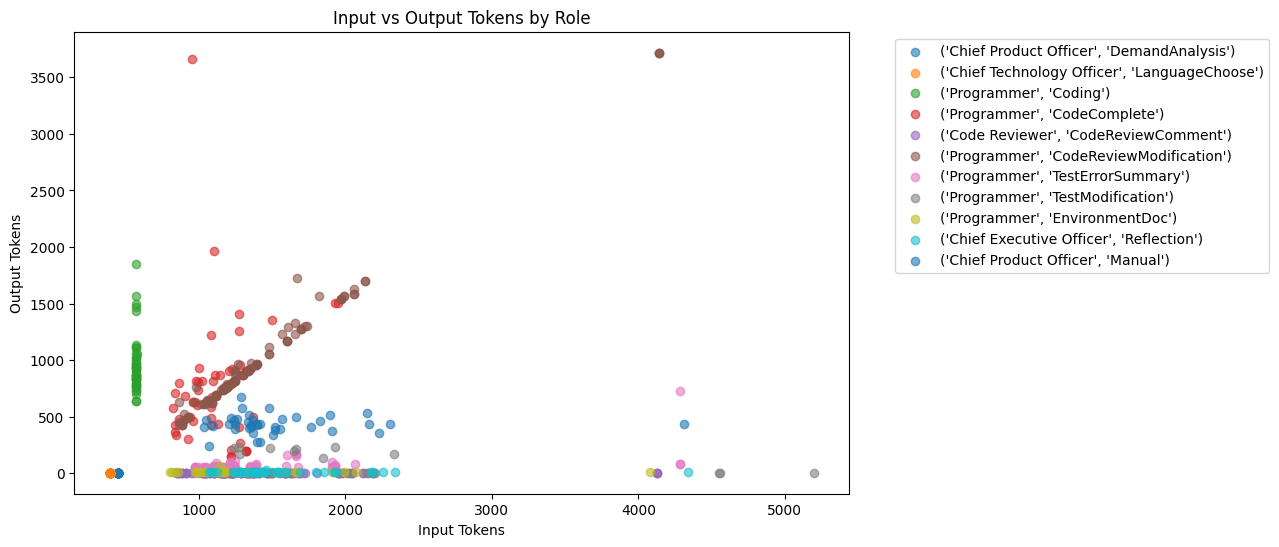

In [3]:
import matplotlib.pyplot as plt

# Prepare data for scatter plot
colors = plt.cm.tab10.colors  # Use a colormap for distinct colors
keys = list(warehouse_statistics.keys())
color_map = {key: colors[i % len(colors)] for i, key in enumerate(keys)}

plt.figure(figsize=(10, 6))

for key, values in warehouse_statistics.items():
    x = [v[0] for v in values]  # prompt_tokens
    y = [v[1] for v in values]  # completion_tokens
    plt.scatter(x, y, label=str(key), color=color_map[key], alpha=.6)

plt.xlabel('Input Tokens')
plt.ylabel('Output Tokens')
plt.title('Input vs Output Tokens by Role')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression


def calculate_linear_regression_loss(values):
    x = np.array([v[0] for v in values]).reshape(-1, 1)  # prompt_tokens
    y = np.array([v[1] for v in values])  # completion_tokens
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    loss = np.mean((y - y_pred) ** 2)
    return loss
# Calculate linear regression loss for each key
losses = {}
for key, values in warehouse_statistics.items():
    loss = calculate_linear_regression_loss(values)
    losses[key] = loss
# Print the losses
keys_not_fitted = []
for key, loss in losses.items():
    if loss > 0.1:
        keys_not_fitted.append(key)
    print(f"Key: {key}, Loss: {loss:.2f}")


Key: ('Chief Product Officer', 'DemandAnalysis'), Loss: 0.00
Key: ('Chief Technology Officer', 'LanguageChoose'), Loss: 0.00
Key: ('Programmer', 'Coding'), Loss: 64958.65
Key: ('Programmer', 'CodeComplete'), Loss: 312831.19
Key: ('Code Reviewer', 'CodeReviewComment'), Loss: 0.00
Key: ('Programmer', 'CodeReviewModification'), Loss: 3467.72
Key: ('Programmer', 'TestErrorSummary'), Loss: 6086.42
Key: ('Programmer', 'TestModification'), Loss: 5357.79
Key: ('Programmer', 'EnvironmentDoc'), Loss: 65.19
Key: ('Chief Executive Officer', 'Reflection'), Loss: 7.50
Key: ('Chief Product Officer', 'Manual'), Loss: 6484.05


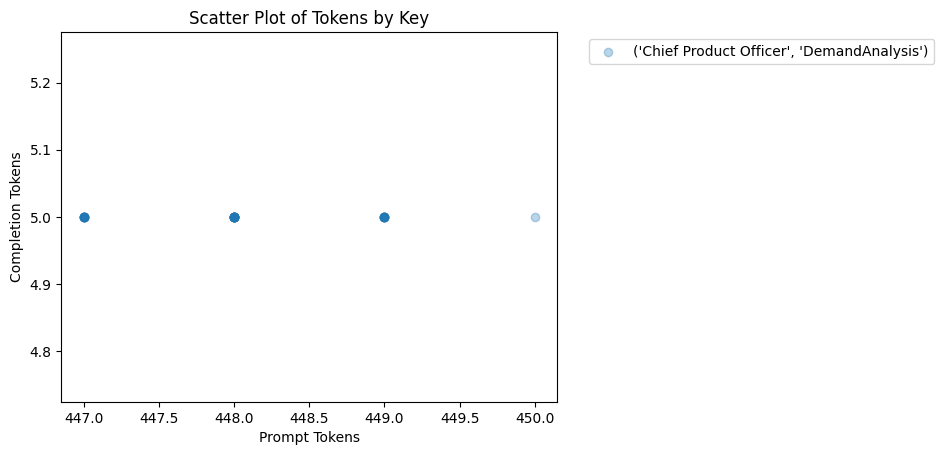

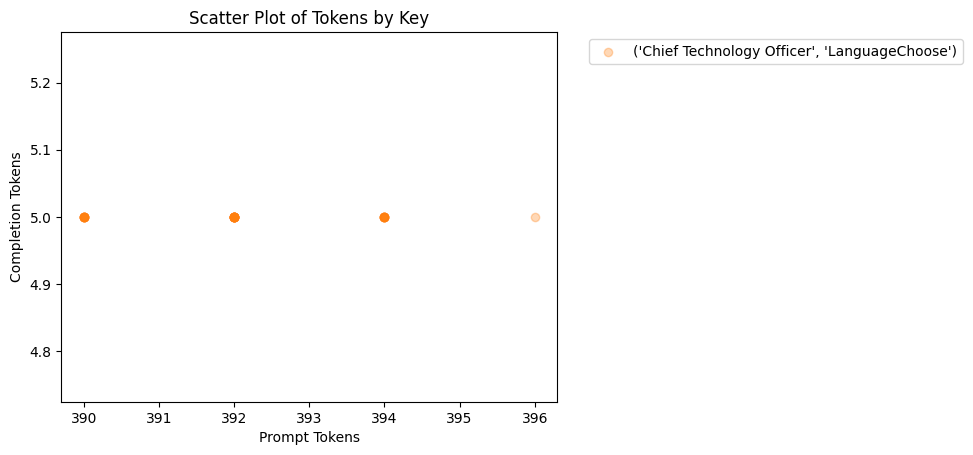

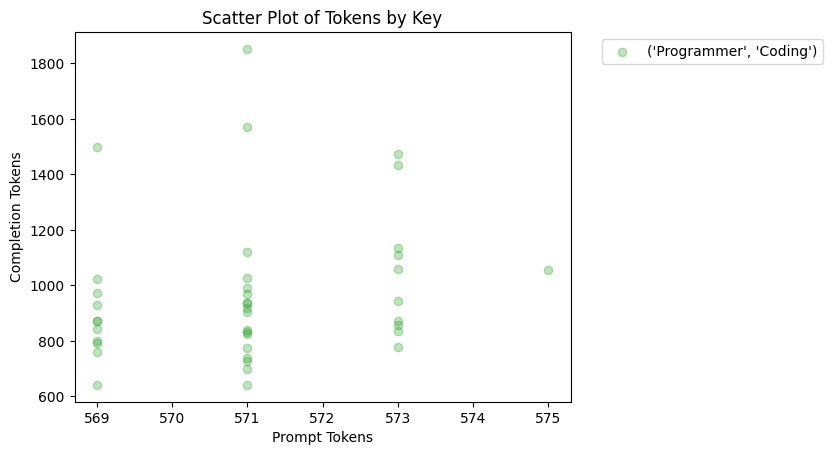

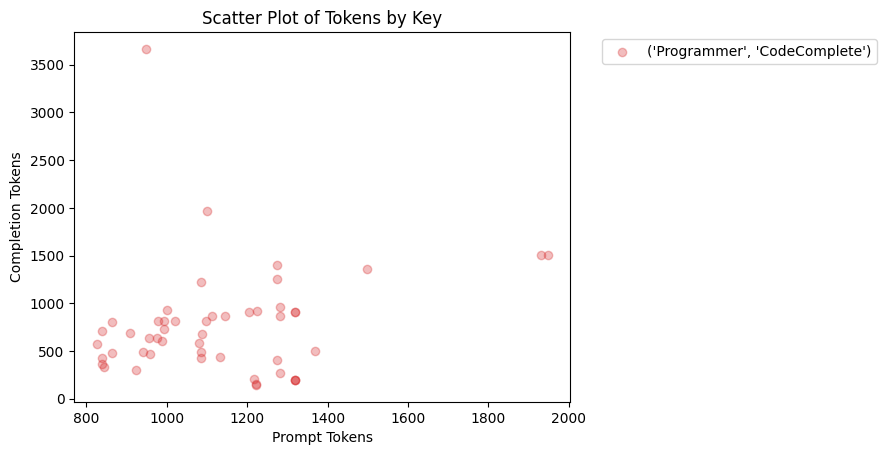

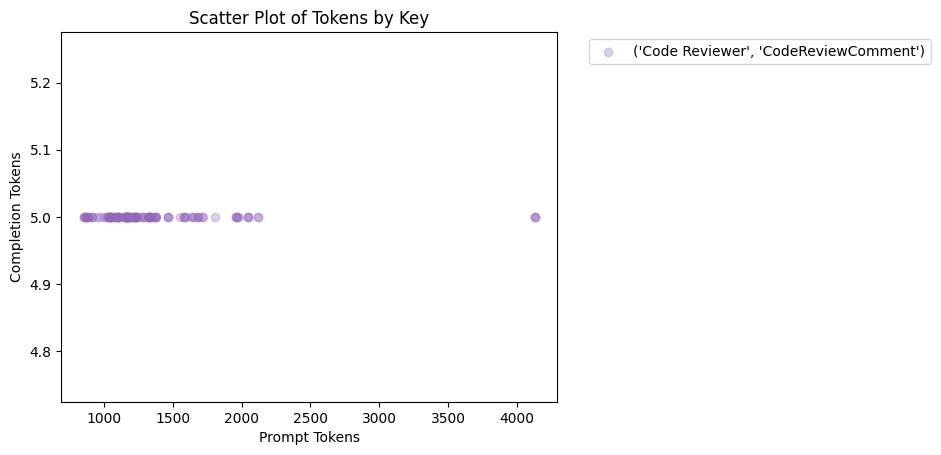

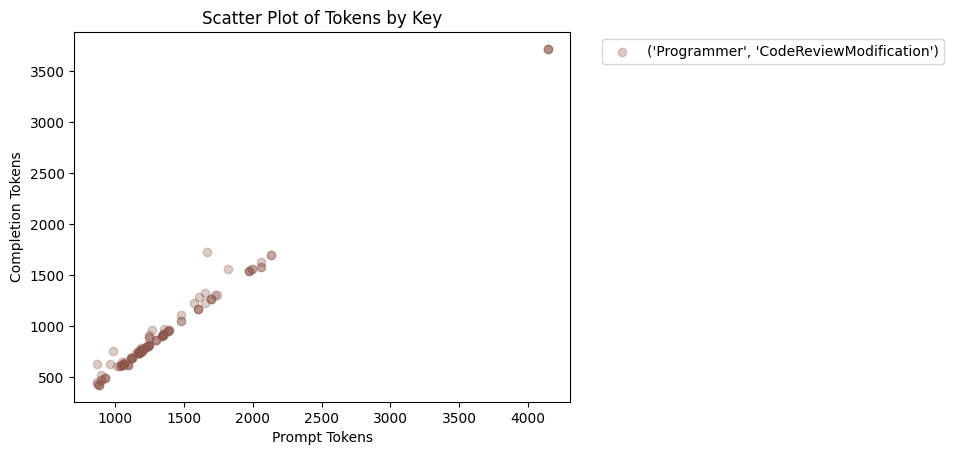

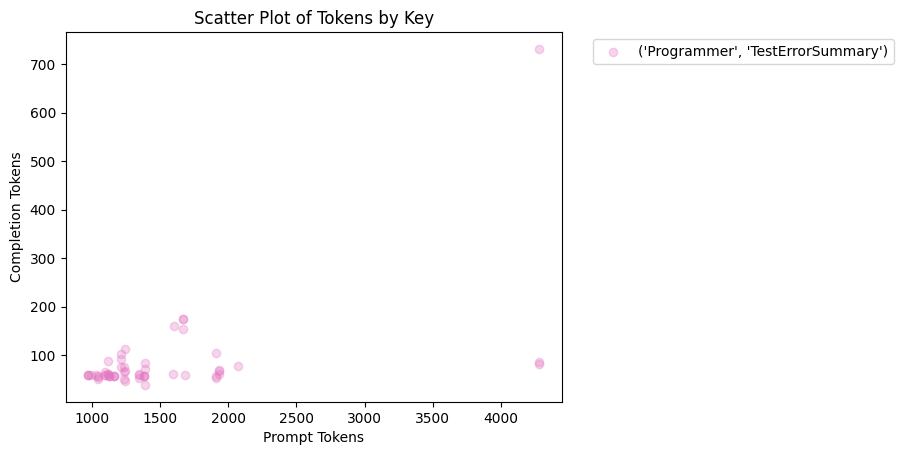

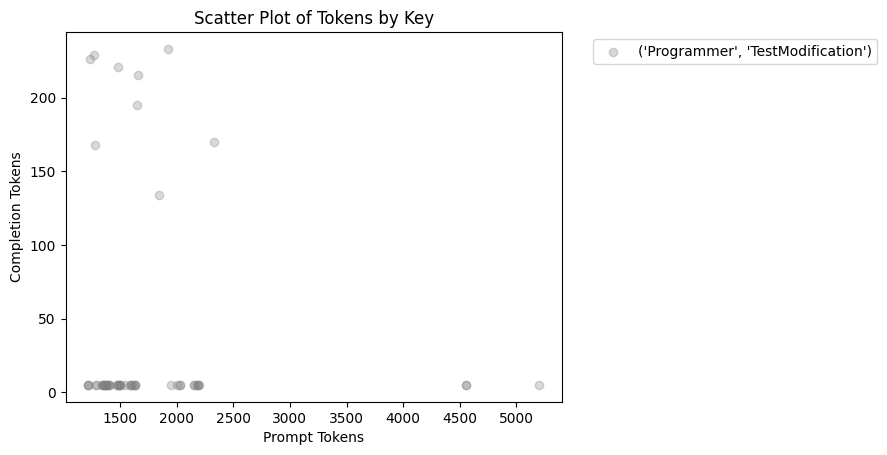

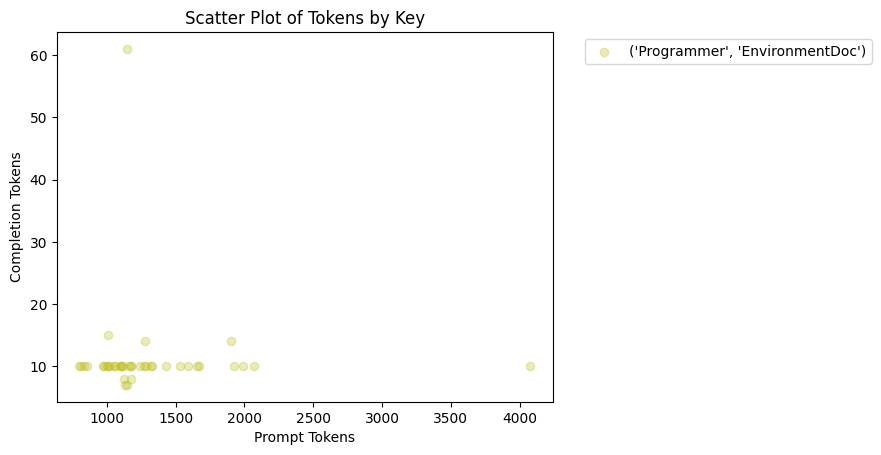

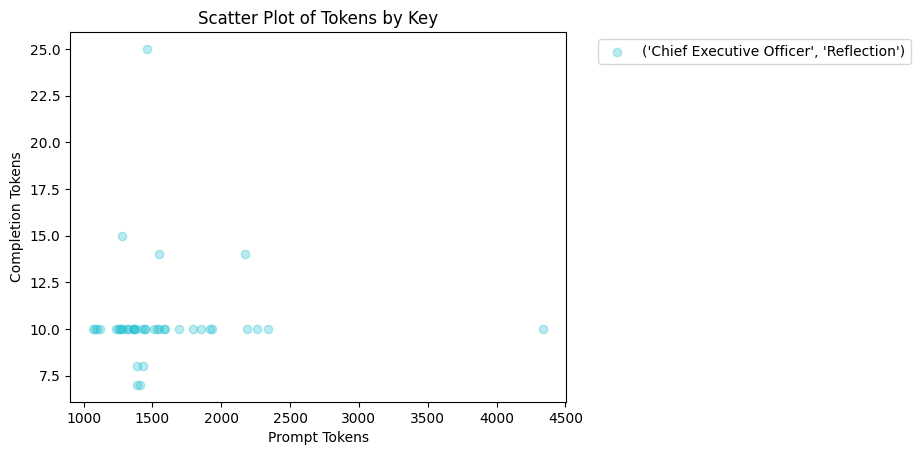

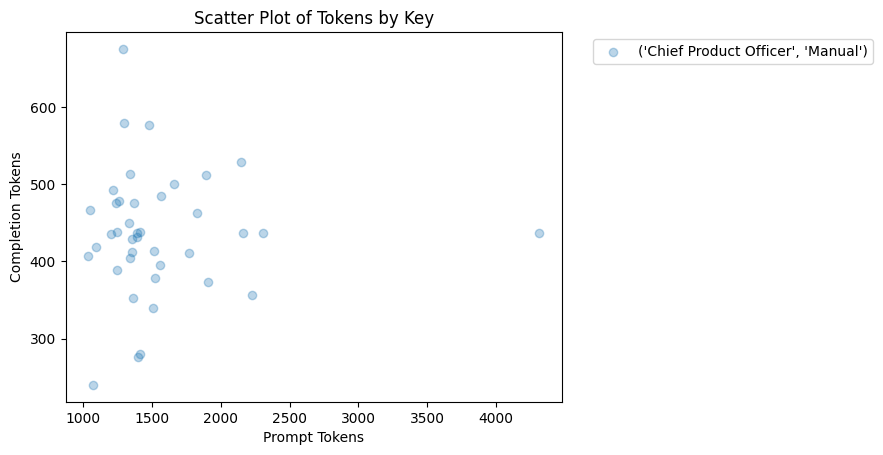

In [10]:
for k, vs in warehouse_statistics.items():
    x = [v[0] for v in vs]
    y = [v[1] for v in vs]
    plt.scatter(x, y, label=str(k), color=color_map[k], alpha=.3)
    plt.xlabel('Prompt Tokens')
    plt.ylabel('Completion Tokens')
    plt.title('Scatter Plot of Tokens by Key')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()